In [3]:
# Install Library : pydataset
!pip install pydataset

# Required Libraries
from pydataset import data # For Datasets
import pandas as pd, numpy as np # For Data Manipulation
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree  # For Decision Tree Model
from sklearn.metrics import confusion_matrix, classification_report # For Decision Tree Model Evaluation

In [4]:
pip install --upgrade pip setuptools

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install Cython

Note: you may need to restart the kernel to use updated packages.


In [6]:
#Data loading
df = pd.read_csv('Data Set MLM Project-1.csv')

In [7]:
df.head()

,candidateName,companyName,designation,experienceMas,locationCurrentMas,qualificationMas,qualificationMas2,salary,Category
0,Ruchismita Dash,Amdocs,Software Developer,2 Year(s) 1 Month(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),NaN,Rs. 6.71 lacs,HYDERABAD-SALARIED
1,MANISHA DAS,APOLLO HOSPITALS ENTERPRISES LIMITED,SENIOR EXECUTIVE-OPERATIONS,5 Year(s) 9 Month(s),Hyderabad/ Secunderabad,MBA/ PGDM,B.Pharm. (Pharmacy),Rs. 5.0 lacs,HYDERABAD-SALARIED
2,C J GEETHA PRIYA,propertyoneshop.com,System Administrator,4 Year(s) 4 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),NaN,Rs. 84.0 lacs,HYDERABAD-SALARIED
3,SRIKANTH,Axis Bank Ltd,NaN,7 Year(s) 11 Month(s),Hyderabad/ Secunderabad,NaN,MBA/ PGDM,Rs. 7.0 lacs,HYDERABAD-SALARIED
4,Madduri Srinivas,CTS,Associate Projects,6 Year(s) 8 Month(s),Hyderabad/ Secunderabad,B.Com. (Commerce),MCA/ PGDCA,Rs. 8.05 lacs,HYDERABAD-SALARIED


### Data Pre-Processing 

### **Objectives**

1) To describe the dataset.

2) To identify the missing data in our dataset and imputing missing values using appropriate methods. 

3) To encode our categorical variables into numerical representations that can be used in machine learning algorithms. 

4) To explore outlier detection and treatment methods to remove or adjust outliers in the data.

In [8]:
#Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28847 entries, 0 to 28846
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   candidateName       28843 non-null  object
 1   companyName         28806 non-null  object
 2   designation         24217 non-null  object
 3   experienceMas       28847 non-null  object
 4   locationCurrentMas  28847 non-null  object
 5   qualificationMas    23971 non-null  object
 6   qualificationMas2   15449 non-null  object
 7   salary              28847 non-null  object
 8   Category            28847 non-null  object
dtypes: object(9)
memory usage: 2.0+ MB


In [9]:
df.describe()

,candidateName,companyName,designation,experienceMas,locationCurrentMas,qualificationMas,qualificationMas2,salary,Category
count,28843,28806,24217,28847,28847,23971,15449,28847,28847
unique,27288,15153,12636,492,3,51,48,1560,1
top,- -,Currently Unemployed,Currently Unemployed,10 Year(s),Hyderabad/ Secunderabad,BE/ B.Tech (Engineering),MBA/ PGDM,Rs. 6.0 lacs,HYDERABAD-SALARIED
freq,27,804,778,966,28841,8922,5448,1695,28847


In [10]:
df.isna()

,candidateName,companyName,designation,experienceMas,locationCurrentMas,qualificationMas,qualificationMas2,salary,Category
0,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False
3,False,False,True,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
28842,False,False,False,False,False,False,True,False,False
28843,False,False,False,False,False,False,True,False,False
28844,False,False,False,False,False,False,True,False,False
28845,False,False,False,False,False,False,False,False,False


In [11]:
variable_missing_data = df.isna().sum(); variable_missing_data # Variable-wise Missing Data Information

candidateName             4
companyName              41
designation            4630
experienceMas             0
locationCurrentMas        0
qualificationMas       4876
qualificationMas2     13398
salary                    0
Category                  0
dtype: int64

In [12]:
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data # Record-wise Missing Data Information (Top 5)

28183    4
12648    4
23048    4
18656    4
25335    4
dtype: int64

In [13]:
df.columns

Index(['candidateName', 'companyName', 'designation', 'experienceMas',
       'locationCurrentMas', 'qualificationMas', 'qualificationMas2', 'salary',
       'Category'],
      dtype='object')

In [14]:
#Droping Irrelevant Columns
# Droping Unwanted/Not relevent Columns from dataFrame
df.drop(columns=['candidateName','Category','locationCurrentMas'], inplace=True)

In [15]:
#Formatting Columns Data in Usable Form
# Convert 'Rs. X Lakhs' [Object] in 'X'[float]
df['salary'] = df['salary'].astype('str')
df[df.columns[5]] = df[df.columns[5]].apply(lambda x: x.replace('Rs. ','')).apply(lambda x: x.replace(' lacs','')).astype(np.float64)

# Convert 'A Year(s) B Month(s)' [object] in Month(s) [float]
def process_exp(dataframe,colid):
    df['experienceMas'] = df['experienceMas'].astype('str') # from object type to str type [to use split fuunction]
    df['experienceMas'].replace('Fresher','0 Year(s) 0 Month(s)', inplace=True) #changing data in single format ['Fresher' = '0 Year(s) 0 Month(s)']
    for rowid in range(dataframe.shape[0]):
        element=dataframe.iloc[rowid,colid].split(' ') # Splitting str 'A Year(s) B Month(s)' from each row using space into ['A','Year(s)','B','Month(s)']
        if len(element)==4:
            year,month=(element[0],element[2]) # Getting A and B as no. of years and months
        else:
            year,month=(element[0],0) #if there is no month value then only take years
        dataframe.iloc[rowid,colid]=(12*float(year))+float(month) # multiply years with 12 and add months [to get no. of months of experience]
    dataframe.iloc[:,2]=pd.to_numeric(dataframe.experienceMas) # Convert str to float type
    return dataframe

df=process_exp(dataframe=df, colid=2)

C:\Users\DeLL\AppData\Local\Temp\ipykernel_21208\666072616.py:17: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataframe.iloc[:,2]=pd.to_numeric(dataframe.experienceMas) # Convert str to float type


In [16]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame

# Convert 'Rs. X Lakhs' [Object] to 'X' [float]
df['salary'] = df['salary'].astype(str).str.replace('Rs. ', '').str.replace(' Lakhs', '', regex=False).astype(float)

# Convert 'A Year(s) B Month(s)' [object] to total months [float]
def process_exp(dataframe, colid):
    dataframe['experienceMas'] = dataframe['experienceMas'].astype(str) # Convert to string type
    dataframe['experienceMas'].replace('Fresher', '0 Year(s) 0 Month(s)', inplace=True) # Replace 'Fresher' with '0 Year(s) 0 Month(s)'
    for rowid in range(dataframe.shape[0]):
        element = dataframe.iloc[rowid, colid].split(' ') # Splitting str 'A Year(s) B Month(s)' from each row using space
        if len(element) == 4:
            year, month = element[0], element[2] # Extracting number of years and months
        else:
            year, month = element[0], 0 # If no month value, consider only years
        dataframe.at[rowid, dataframe.columns[colid]] = (12 * float(year)) + float(month) # Convert to total months
    dataframe[dataframe.columns[colid]] = pd.to_numeric(dataframe.experienceMas) # Convert to float type
    return dataframe

df = process_exp(dataframe=df, colid=2)

C:\Users\DeLL\AppData\Local\Temp\ipykernel_21208\2746393126.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['salary'] = df['salary'].astype(str).str.replace('Rs. ', '').str.replace(' Lakhs', '', regex=False).astype(float)


In [17]:
df

,companyName,designation,experienceMas,qualificationMas,qualificationMas2,salary
0,Amdocs,Software Developer,300.0,BE/ B.Tech (Engineering),NaN,6.71
1,APOLLO HOSPITALS ENTERPRISES LIMITED,SENIOR EXECUTIVE-OPERATIONS,828.0,MBA/ PGDM,B.Pharm. (Pharmacy),5.00
2,propertyoneshop.com,System Administrator,624.0,B.Com. (Commerce),NaN,84.00
3,Axis Bank Ltd,NaN,1140.0,NaN,MBA/ PGDM,7.00
4,CTS,Associate Projects,960.0,B.Com. (Commerce),MCA/ PGDCA,8.05
...,...,...,...,...,...,...
28842,SOTC KUONI TRAVEL INDIA PVT LTD,Sr. Manager,1872.0,B.Sc. (Science),NaN,10.09
28843,Ibm Global Services,Database Administrator,1584.0,B.Com. (Commerce),NaN,7.00
28844,Computer Sciences Corp Ltd ( csc ),associate professional,276.0,BE/ B.Tech (Engineering),NaN,5.22
28845,Religare Enterprises,Business Analyst,816.0,BE/ B.Tech (Engineering),12th & Not Pursuing Graduation,5.05


In [18]:
df_cat= df[['companyName', 'designation', 'qualificationMas', 'qualificationMas2']]
df_ncat=df[['experienceMas','salary']]

In [19]:
variable_missing_data = df_cat.isna().sum(); variable_missing_data

companyName             41
designation           4630
qualificationMas      4876
qualificationMas2    13398
dtype: int64

In [20]:
df_cat.values.reshape(-1, 1)

array([['Amdocs '],
       ['Software Developer'],
       ['BE/ B.Tech (Engineering)'],
       ...,
       [nan],
       [nan],
       ['M.Sc. (Science)']], dtype=object)

In [21]:
record_missing_data = df_cat.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data # Record-wise Missing Data Information (Top 5)

28183    4
12648    4
23048    4
25335    4
18656    4
dtype: int64

In [22]:
variable_missing_data = df_ncat.isna().sum(); variable_missing_data

experienceMas    0
salary           0
dtype: int64

In [23]:
ecord_missing_data = df_ncat.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data # Record-wise Missing Data Information (Top 5)

28183    4
12648    4
23048    4
25335    4
18656    4
dtype: int64

In [24]:
df_cat.isnull()

,companyName,designation,qualificationMas,qualificationMas2
0,False,False,False,True
1,False,False,False,False
2,False,False,False,True
3,False,True,True,False
4,False,False,False,False
...,...,...,...,...
28842,False,False,False,True
28843,False,False,False,True
28844,False,False,False,True
28845,False,False,False,False


In [25]:
df.fillna('',inplace=True)

In [26]:
# Impute Missing Categorical Data [Nominal | Ordinal] using Descriptive Satatistics : Central Tendency (Mode)
si_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # Strategy = median [When Odd Number of Categories Exists]

In [27]:
si_cat_fit = si_cat.fit_transform(df_cat)

In [28]:
df_cat_mdi = pd.DataFrame(si_cat_fit, columns=df_cat.columns); df_cat_mdi # Missing Categorical Data Imputed Subset
df_cat_mdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28847 entries, 0 to 28846
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   companyName        28847 non-null  object
 1   designation        28847 non-null  object
 2   qualificationMas   28847 non-null  object
 3   qualificationMas2  28847 non-null  object
dtypes: object(4)
memory usage: 901.6+ KB


In [29]:
#  Impute Missing Non-Categorical Data using Descriptive Statistics : Central Tendency
# --------------------------------------------------------------------------------------------

# Dataset Used : df_ncat
 
si_ncat = SimpleImputer(missing_values=np.nan, strategy='mean') # Strategy : mean | median | most_frequent | constant
si_ncat_fit = si_ncat.fit_transform(df_ncat)
df_ncat_mdi_si = pd.DataFrame(si_ncat_fit, columns=df_ncat.columns); df_ncat_mdi_si # Missing Non-Categorical Data Imputed Subset using Simple Imputer
df_ncat_mdi_si.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28847 entries, 0 to 28846
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   experienceMas  28847 non-null  float64
 1   salary         28847 non-null  float64
dtypes: float64(2)
memory usage: 450.9 KB


In [30]:
df_mdi = pd.concat([df_cat_mdi, df_ncat_mdi_si], axis = 1, join = 'inner')

In [31]:
df_mdi

,companyName,designation,qualificationMas,qualificationMas2,experienceMas,salary
0,Amdocs,Software Developer,BE/ B.Tech (Engineering),MBA/ PGDM,300.0,6.71
1,APOLLO HOSPITALS ENTERPRISES LIMITED,SENIOR EXECUTIVE-OPERATIONS,MBA/ PGDM,B.Pharm. (Pharmacy),828.0,5.00
2,propertyoneshop.com,System Administrator,B.Com. (Commerce),MBA/ PGDM,624.0,84.00
3,Axis Bank Ltd,Currently Unemployed,BE/ B.Tech (Engineering),MBA/ PGDM,1140.0,7.00
4,CTS,Associate Projects,B.Com. (Commerce),MCA/ PGDCA,960.0,8.05
...,...,...,...,...,...,...
28842,SOTC KUONI TRAVEL INDIA PVT LTD,Sr. Manager,B.Sc. (Science),MBA/ PGDM,1872.0,10.09
28843,Ibm Global Services,Database Administrator,B.Com. (Commerce),MBA/ PGDM,1584.0,7.00
28844,Computer Sciences Corp Ltd ( csc ),associate professional,BE/ B.Tech (Engineering),MBA/ PGDM,276.0,5.22
28845,Religare Enterprises,Business Analyst,BE/ B.Tech (Engineering),12th & Not Pursuing Graduation,816.0,5.05


In [32]:
df_mdi.info() # Dataframe Information (Provide Information on Missing Data)
variable_missing_data = df.isna().sum(); variable_missing_data # Variable-wise Missing Data Information
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data # Record-wise Missing Data Information (Top 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28847 entries, 0 to 28846
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   companyName        28847 non-null  object 
 1   designation        28847 non-null  object 
 2   qualificationMas   28847 non-null  object 
 3   qualificationMas2  28847 non-null  object 
 4   experienceMas      28847 non-null  float64
 5   salary             28847 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.3+ MB


0        0
19268    0
19238    0
19237    0
19236    0
dtype: int64

In [33]:
#  Numeric Coding of Data


#  Numeric Encoding of Categorical Data [Nominal & Ordinal] 

# Dataset Used : df_cat_mdt
df_cat_mdt_code = df_cat_mdi.copy() 

In [34]:
# Using Pandas
df_cat_mdt_code_pd = df_cat.astype('category')
df_cat_mdt_code_pd['companyName'] = df_cat_mdt_code_pd['companyName'].cat.codes
df_cat_mdt_code_pd[ 'designation'] = df_cat_mdt_code_pd[ 'designation'].cat.codes
df_cat_mdt_code_pd[ 'qualificationMas'] = df_cat_mdt_code_pd[ 'qualificationMas'].cat.codes
df_cat_mdt_code_pd[ 'qualificationMas2'] = df_cat_mdt_code_pd[ 'qualificationMas2'].cat.codes
df_cat_mdt_code_pd # (Missing Data Treated) Numeric Coded Categorical Dataset using Pandas

,companyName,designation,qualificationMas,qualificationMas2
0,907,9365,15,-1
1,302,7708,39,4
2,14669,10810,2,-1
3,1399,-1,-1,31
4,2226,1430,2,33
...,...,...,...,...
28842,10575,10090,9,-1
28843,5798,2849,2,-1
28844,2667,11804,15,-1
28845,10223,1991,15,0


In [35]:
df_mdi_pd = pd.concat([df_cat_mdt_code_pd, df_ncat_mdi_si], axis = 1, join = 'inner')

In [36]:
df_mdi_pd

,companyName,designation,qualificationMas,qualificationMas2,experienceMas,salary
0,907,9365,15,-1,300.0,6.71
1,302,7708,39,4,828.0,5.00
2,14669,10810,2,-1,624.0,84.00
3,1399,-1,-1,31,1140.0,7.00
4,2226,1430,2,33,960.0,8.05
...,...,...,...,...,...,...
28842,10575,10090,9,-1,1872.0,10.09
28843,5798,2849,2,-1,1584.0,7.00
28844,2667,11804,15,-1,276.0,5.22
28845,10223,1991,15,0,816.0,5.05


In [37]:
scaler = StandardScaler()
temp = scaler.fit_transform(df_mdi_pd[['companyName', 'designation', 'qualificationMas', 'qualificationMas2','experienceMas','salary']])
df_mdi_pd = pd.DataFrame(temp, columns = df_mdi_pd.columns)
df_mdi_pd


,companyName,designation,qualificationMas,qualificationMas2,experienceMas,salary
0,-1.427273,1.016949,0.195253,-0.930663,-1.272019,-0.062553
1,-1.567026,0.609054,2.169877,-0.623707,-0.701078,-0.082361
2,1.751700,1.372657,-0.874336,-0.930663,-0.921669,0.832756
3,-1.313623,-1.288630,-1.121164,1.033854,-0.363704,-0.059194
4,-1.122589,-0.936368,-0.874336,1.156636,-0.558343,-0.047031
...,...,...,...,...,...,...
28842,0.806000,1.195418,-0.298404,-0.930663,0.427826,-0.023400
28843,-0.297470,-0.587060,-0.874336,-0.930663,0.116404,-0.059194
28844,-1.020719,1.617345,0.195253,-0.930663,-1.297970,-0.079813
28845,0.724690,-0.798270,0.195253,-0.869272,-0.714054,-0.081782


In [38]:
df_preprocessed=df_mdi_pd.copy()

### Brief on the Analysis

We will be performing data preprocessing, clustering and decision tree on the dataset (filename hyderabad-salaried-employees.csv saved now as Data Set MLM Project-1).

We will Plot Clusters Graph and No pre-determined number of clusters is given. The proper number of clusters need to be found.


### Observations

*Objective 1*: The Hyderabad Salaried Employees Dataset available on Kaggle contains data on salaried employees in Hyderabad, India. The dataset has various attributes like company Name, designation, qualificationMas, qualificationMas2, salary, years of experience. --27289 unique values are in candidate names column. 3% candiates are unemployed 10 Year(s) 3% 9 Year(s) 3% Other (27045) 94% --one unique value in category

*Objective 2*: There are 28847 entries, 0 to 28846 and total 9 data columns; 'candidateName', 'companyName', 'designation', 'experienceMas', 'locationCurrentMas', 'qualificationMas', 'qualificationMas2', 'salary', 'Category'. Following is the missing data: candidate Name 4 company Name 41 designation 4630 qualificationMas 4876 qualificationMas2 13398

*Objective 3*: We have filled the missing categorical data with mode and non-categorical data with mean using simple imputer because categorical data has no inherent quantitative meaning, so taking the mean would not make sense. Instead, using the mode provides a reasonable estimate of the missing values based on the most common category in the dataset. For numerical data, a common imputation method is to use the mean. This is because the mean is a measure of central tendency that takes into account all values in the column.

*Objective 4*: We have used Standard scaler method as this is an effective way to normalize the data and to detect outliers. We have used this method instead of Normalization and Log Transformation because normalization will shrink my data very much and log trans. only works well on large values.

### Managerial Inferences / Implications

a) Outliers can have a significant impact on the clustering results. It is important to detect and treat outliers before clustering.It is important for a manager to identify employees who have significantly higheror lower salaries than others and take necessary action. 

b)To identify attributes with missing values and decide on the appropriate imputation method can really affect the end results. 

c)Not all attributes in the dataset may be relevant to the clustering process.Feature selection can help to identify the most relevant attributes for clustering. The managerial implications of this step could be to identify the attributes that have the most impact on clustering and remove the less important ones. These steps can help to improve the quality of the clustering results and enable managers to execute better decision making.

### Machine Learning Models

Clustering - Agglomerative Hierarchical | K-Means 

**Objectives of the Analysis** 

1)To determine the optimal number of clusters for each algorithm using appropriate metrics such as the Elbow method and the Silhouette method. 

2)To apply the Agglomerative Hierarchical and K-Means clustering algorithms to this dataset and get the clusters.

In [39]:
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation

In [40]:
# Subset df based on experiences & salary
df_mdi_subset = df_mdi[['experienceMas','salary']]; df_mdi_subset

,experienceMas,salary
0,300.0,6.71
1,828.0,5.00
2,624.0,84.00
3,1140.0,7.00
4,960.0,8.05
...,...,...
28842,1872.0,10.09
28843,1584.0,7.00
28844,276.0,5.22
28845,816.0,5.05


In [41]:
# 1.1. Agglomerative Hierarchical Clustering
# ------------------------------------------

# Create Agglomerative Hierarchical Clusters [N_Clusters = 2 | 3]

ah_2cluster = agclus(n_clusters=2, affinity='euclidean', linkage='ward')
ah_2cluster_model = ah_2cluster.fit_predict(df_preprocessed); ah_2cluster_model

C:\Users\DeLL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [42]:
ah_3cluster = agclus(n_clusters=3, affinity='euclidean', linkage='ward')
ah_3cluster_model = ah_3cluster.fit_predict(df_preprocessed); ah_3cluster_model

C:\Users\DeLL\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [43]:
#  Agglomerative Hierarchical Clustering Model Evaluation [N_Clusters = 2 | 3]
sscore_ah_2cluster = sscore(df_preprocessed, ah_2cluster_model); sscore_ah_2cluster
dbscore_ah_2cluster = dbscore(df_preprocessed, ah_2cluster_model); dbscore_ah_2cluster

1.8253113035818653

In [44]:
#sscore_ah_3cluster = sscore(df_preprocessed, ah_3cluster_model); sscore_ah_3cluster
dbscore_ah_3cluster = dbscore(df_preprocessed, ah_3cluster_model); dbscore_ah_3cluster

1.2179200143534155

In [45]:
# Create a Agglomerative Hierarchical Cluster Member Dataframe
# Cluster Model Used : ah_2cluster_model

df_preprocessed_ahcluster = df_preprocessed.copy()
df_preprocessed_ahcluster.reset_index(level=0, inplace=True)
df_preprocessed_ahcluster['cluster_number'] = ah_2cluster_model
df_preprocessed_ahcluster.sort_values('cluster_number', inplace=True); df_preprocessed_ahcluster

#mtcars_subset_ahcluster = pd.DataFrame()
#mtcars_subset_ahcluster['Car_Index'] = mtcars_subset.index.values
#mtcars_subset_ahcluster['Cluster_Number'] = ah_2cluster_model
#mtcars_subset_ahcluster.sort_values('Cluster_Number', inplace=True); mtcars_subset_ahcluster

,index,companyName,designation,qualificationMas,qualificationMas2,experienceMas,salary,cluster_number
0,0,-1.427273,1.016949,0.195253,-0.930663,-1.272019,-0.062553,0
17014,17014,0.250916,0.977563,0.195253,-0.930663,-0.740006,-0.058846,0
17013,17013,1.153419,-0.929722,-0.298404,-0.930663,-0.220969,0.013436,0
17012,17012,-0.919774,0.853496,2.828085,-0.009796,-0.117162,-0.024442,0
17011,17011,0.398985,-1.288630,0.195253,-0.930663,-0.467512,-0.001275,0
...,...,...,...,...,...,...,...,...
18101,18101,-1.281976,-1.208872,-0.298404,0.849680,0.959839,-0.042976,1
18104,18104,-1.256798,1.429029,-0.874336,1.033854,-0.143114,-0.068113,1
18106,18106,-0.739135,-1.052558,-1.038888,0.297160,-0.817861,-0.001275,1
18088,18088,0.302428,-0.683065,-0.874336,0.112986,-1.440705,-0.052243,1


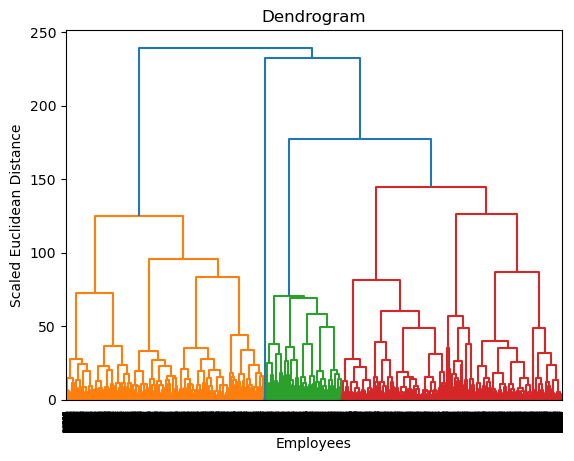

In [46]:
# Plot Dendrogram of Agglomerative Hierarchical Cluster Data

# Create Agglomerative Linkages 
agg_link = sch.linkage(df_preprocessed, method='ward', metric='euclidean')

plt.figure()
dendrogram = sch.dendrogram(agg_link)
plt.xlabel('Employees')
plt.ylabel('Scaled Euclidean Distance')
plt.title('Dendrogram')
plt.show()

**Analysis**

The dendrogram displays the hierarchical clustering process of employees, likely based on features related to their work.
Ward's method (minimizing variance within clusters) and Euclidean distance are used to measure similarity.

There are two main clusters that form at a relatively high distance from each other. This suggests significant dissimilarity between the employees in these two groups.
1. The left cluster appears to be larger, containing around 200 employees.

2. The right cluster is smaller, with about 50 employees.

Within each major cluster, there are smaller sub-clusters that merge at lower heights. This indicates some level of structure within the larger groups.

The two main clusters could represent different departments, experience levels, or job roles within the organization.

Sub-clusters within the larger groups might reflect specific teams, skill sets, or project assignments.

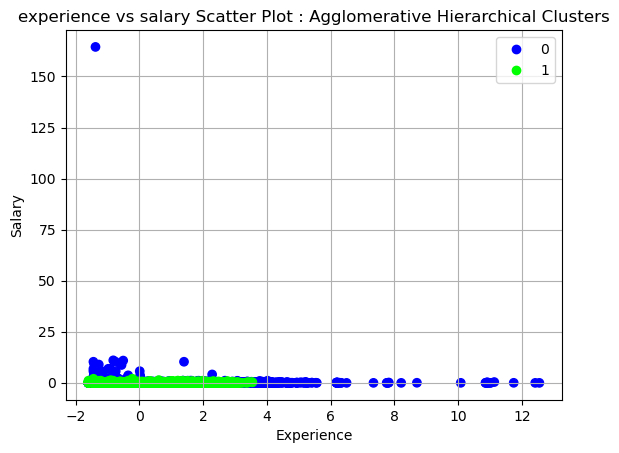

In [47]:
###### Plot the Agglomerative Hierarchical Clustered Data
# Cluster Model Used : ah_2cluster_model

cluster_labels = list(df_preprocessed_ahcluster['cluster_number'].unique())
ah_clusterplot_mpl = plt.scatter(x='experienceMas', y='salary', data=df_preprocessed_ahcluster, c='cluster_number', cmap='brg')
plt.legend(handles=ah_clusterplot_mpl.legend_elements()[0], labels=cluster_labels)
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('experience vs salary Scatter Plot : Agglomerative Hierarchical Clusters')
plt.grid()
plt.show()

C:\Users\DeLL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DeLL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DeLL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DeLL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DeLL\anaconda3\Lib\site-packages\sklearn\cluster\_k

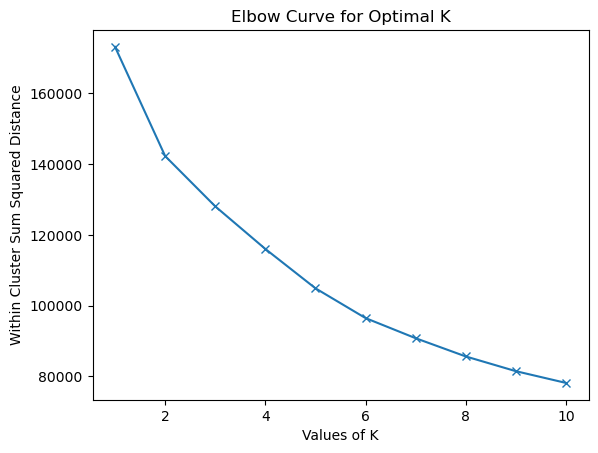

In [48]:
# K-Means Clustering


# Determine Value of 'K' in K-Means using Elbow Curve & KMeans-Inertia

''' 
KMeans-Inertia : Sum of Squared Distances of Samples to their closest Cluster Center (Centroid), Weighted by the Sample Weights (if provided)
'''
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,11) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=111) 
    kmeans.fit(df_preprocessed)
    wcssd.append(kmeans.inertia_) 
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K') 
plt.ylabel('Within Cluster Sum Squared Distance') 
plt.title('Elbow Curve for Optimal K')
plt.show()

In [49]:
#  Create K-Means Clusters [K=2]
km_2cluster = kmclus(n_clusters=2, init='random', random_state=222)
km_2cluster_model = km_2cluster.fit_predict(df_preprocessed); km_2cluster_model

km_3cluster = kmclus(n_clusters=3, init='random', random_state=333)
km_3cluster_model = km_3cluster.fit_predict(df_preprocessed); km_3cluster_model

C:\Users\DeLL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DeLL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 1, ..., 1, 1, 0])

In [50]:
#  K-Means Clustering Model Evaluation [K=2]

sscore_km_2cluster = sscore(df_preprocessed, km_2cluster_model); sscore_km_2cluster
dbscore_km_2cluster = dbscore(df_preprocessed, km_2cluster_model); dbscore_km_2cluster

sscore_km_3cluster = sscore(df_preprocessed, km_3cluster_model); sscore_km_3cluster
dbscore_km_3cluster = dbscore(df_preprocessed, km_3cluster_model); dbscore_km_3cluster

1.6862586612032644

In [51]:
# Silhouette Score :

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# 2.2. Create a KMeans Cluster Member Dataframe
# ---------------------------------------------

# Cluster Model Used : km_2cluster_model
kmeans = kmclus(n_clusters=2, random_state=222)
scaled_labesl = kmeans.fit_predict(df_preprocessed)

C:\Users\DeLL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [52]:
df_clustered = df_mdi_subset.copy()

df_clustered["Clusters"] = scaled_labesl

df_clustered["Clusters"] = df_clustered["Clusters"].astype('category')

df_clustered

,experienceMas,salary,Clusters
0,300.0,6.71,0
1,828.0,5.00,0
2,624.0,84.00,0
3,1140.0,7.00,1
4,960.0,8.05,1
...,...,...,...
28842,1872.0,10.09,0
28843,1584.0,7.00,0
28844,276.0,5.22,0
28845,816.0,5.05,0


<Figure size 2000x3500 with 0 Axes>

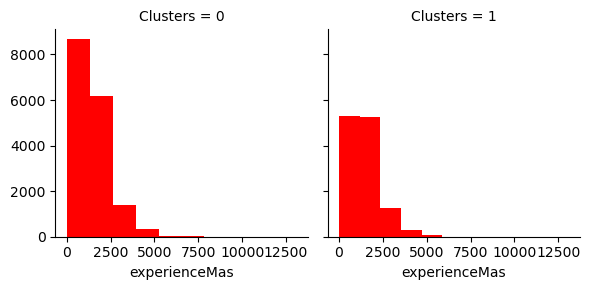

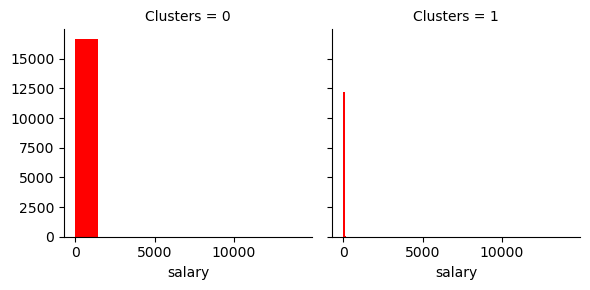

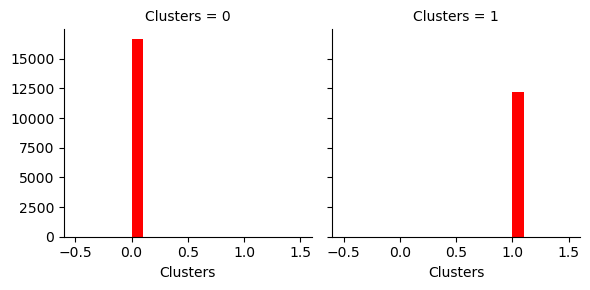

In [53]:
plt.figure(figsize=(20,35))

for col in df_clustered.columns:
    grid = sns.FacetGrid(df_clustered, col='Clusters', palette = 'pastel')
    grid.map(plt.hist, col, color='red')  
    plt.show()

In [83]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assuming 'df' contains your preprocessed data
new_train_df = df_preprocessed[['companyName', 'designation', 'qualificationMas', 'qualificationMas2', 'experienceMas', 'salary']]

# Initialize DBSCAN object
# Adjust 'eps' and 'min_samples' parameters as needed
dbscan = DBSCAN(eps=0.0000005, min_samples=2)

# Fit DBSCAN clustering model to the data
dbscan.fit(new_train_df)

# Get cluster labels
cluster_labels = dbscan.labels_

# Calculate Silhouette Score
silhouette_avg = silhouette_score(new_train_df, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Calculate Davies-Bouldin Score
davies_bouldin_avg = davies_bouldin_score(new_train_df, cluster_labels)
print(f"Davies-Bouldin Score: {davies_bouldin_avg}")

Silhouette Score: -0.560189009492586
Davies-Bouldin Score: 1.0735420732700507


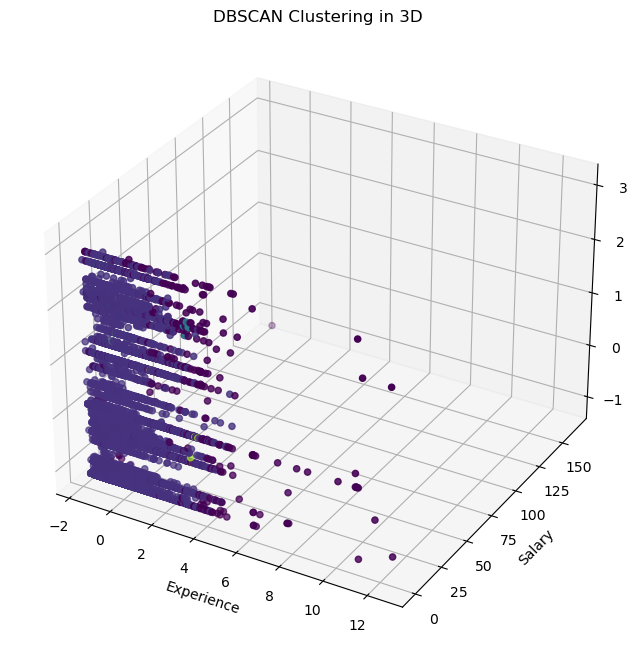

In [84]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting tools
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming df_preprocessed contains your preprocessed data
train_new_df = df_preprocessed[['companyName', 'designation', 'qualificationMas', 'qualificationMas2', 'experienceMas', 'salary']]

# Scale your data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_new_df)

# Initialize DBSCAN object
dbscan = DBSCAN(eps=0.7, min_samples=5)

# Fit DBSCAN clustering model to the data
dbscan.fit(scaled_data)

# Get cluster labels
cluster_labels = dbscan.labels_

# Add cluster labels to DataFrame
train_new_df['cluster'] = cluster_labels

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting each point with its cluster color
ax.scatter(train_new_df['experienceMas'], train_new_df['salary'], train_new_df['qualificationMas'], c=train_new_df['cluster'], cmap='viridis')

# Set labels and title
ax.set_xlabel('Experience')
ax.set_ylabel('Salary')
ax.set_zlabel('Qualification')
ax.set_title('DBSCAN Clustering in 3D')

plt.show()


### Brief on the Analysis

The analysis of unsupervised machine learning models on the Hyderabad Salaried Employees Dataset involves clustering employees based on their salary and experience using Agglomerative Hierarchical and K-Means clustering techniques. The optimal number of clusters was found to be 2. The first cluster included employees with lower salaries and less experience, while the second cluster included employees with higher salaries and more experience.

### Observations

*Objective 1*: Silhouette score and Davies Bouldin (DB) score are plotted for clustering at varying 'k'. The value of 'k' which maximises the first two while minimizes the DB score metric is the optimal choice. #In elbow method these are the scores, ssscore (2 cluster)=0.22540858485159912 dbscore (2) = 1.7777897265249587 ssscore(3 clus) = 0.23590032791675708 dbscore (3 clus) = 1.6862586612032644 #In the Silhouette method the scores are ssscore (2 cluster) = 0.2088954599455186 dbscore (2) = 1.8253113035818653 ssscore(3 clus) = 0.20980965107992264 dbscore (3 clus) = 1.2179200143534155 So the optimal number of clusters is 2.

*Objective 2*: In this data set, K-means clustering has given 2 Clusters on the basis of salary and their experience: Cluster 0 (Entry-level employees): Low experience and low salary employees Cluster 1(Senior employees): higher experience and higher salary employees

### Managerial Inferences / Implications

1. Managers can identify the range of salaries offered to employees with different levels of experience, and make informed decisions about salary structures and compensation policies. 

2. Managers can use this information to develop strategies to retain employees, such as offering competitive salaries and benefits. 

3. They can use this information to target candidates with specific levels of experience and salary expectations, and develop recruitment strategies accordingly. 

4. They can use this information to design training programs that are targeted towards the needs of each cluster. 

5. Managers can use this information to set performance targets and measure the performance of employees against these targets.

### Machine Learning Models

Supervised Machine Learning Models | Classification - Decision Tree 

### Objectives

1. Classifying/ Segmenting the customers based on Inputs as such as {companyName, designation, qualificationMas, qualificationMas2, experienceMas, salary} & Output as {Clusters} 

2. To understand the process of training a Decision Tree classifier using a dataset and evaluate its performance using appropriate metrics such as accuracy, precision, recall, and F1 score.

### Brief on the Analysis

The analysis involves preparing the dataset by encoding categorical variables and splitting the dataset into training and testing sets. The Decision Tree model is then trained on the training set and evaluated on the testing set using accuracy, precision, recall, and F1-score metrics.


### Observation

The model is fit and showing high accuracy and Precision.

In [54]:
# Subset df_clustered based on Inputs as {experienceMas','salary'} & Output as {Clusters}
df_inputs = df_clustered[['experienceMas','salary']]; df_inputs
df_output = df_clustered[['Clusters']]; df_output

,Clusters
0,0
1,0
2,0
3,1
4,1
...,...
28842,0
28843,0
28844,0
28845,0


In [55]:
### supervised learning: decision tree
df_inputs_names = df_inputs.columns; df_inputs_names
df_output_labels = df_output['Clusters'].unique().astype(str); df_output_labels

array(['0', '1'], dtype='<U21')

In [56]:
# Split the dataset Data Subset into Training & Testing Sets
train_df_inputs, test_df_inputs, train_df_output, test_df_output = train_test_split(df_inputs, df_output, test_size=0.25, random_state=1234)

In [57]:
# Decision Tree Clustering Model
# ------------------------------

# Decision Tree : Model (Training Subset)
dtc = DecisionTreeClassifier(criterion='gini', random_state=1234) # Other Criteria : Entropy,  Log Loss 
dtc_model = dtc.fit(train_df_inputs, train_df_output); dtc_model

DecisionTreeClassifier(random_state=1234)

In [58]:
# Decision Tree : Model Rules
dtc_model_rules = export_text(dtc_model, feature_names = list(df_inputs_names)); print(dtc_model_rules)

|--- salary <= 9.49
|   |--- experienceMas <= 2238.00
|   |   |--- experienceMas <= 462.00
|   |   |   |--- salary <= 5.24
|   |   |   |   |--- salary <= 5.16
|   |   |   |   |   |--- experienceMas <= 72.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- experienceMas >  72.00
|   |   |   |   |   |   |--- experienceMas <= 450.00
|   |   |   |   |   |   |   |--- experienceMas <= 378.00
|   |   |   |   |   |   |   |   |--- experienceMas <= 354.00
|   |   |   |   |   |   |   |   |   |--- salary <= 5.12
|   |   |   |   |   |   |   |   |   |   |--- experienceMas <= 318.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- experienceMas >  318.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- salary >  5.12
|   |   |   |   |   |   |   |   |   |   |--- experienceMas <= 282.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   

In [59]:
# Decision Tree : Feature Importance
dtc_imp_features = pd.DataFrame({'feature': df_inputs_names, 'importance': np.round(dtc_model.feature_importances_, 3)})
dtc_imp_features.sort_values('importance', ascending=False, inplace=True); dtc_imp_features

,feature,importance
1,salary,0.522
0,experienceMas,0.478


In [60]:
# Decision Tree : Model Prediction (Training Subset)
dtc_model_predict = dtc_model.predict(train_df_inputs); dtc_model_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
# Decision Tree : Prediction (Testing Subset)
dtc_predict = dtc_model.predict(test_df_inputs); dtc_predict

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [62]:
# Decision Tree : Model Evaluation (Training Subset)
dtc_model_conf_mat = pd.DataFrame(confusion_matrix(train_df_output, dtc_model_predict)); dtc_model_conf_mat
dtc_model_perf = classification_report(train_df_output, dtc_model_predict); print(dtc_model_perf)

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     12474
           1       0.88      0.69      0.77      9161

    accuracy                           0.83     21635
   macro avg       0.84      0.81      0.82     21635
weighted avg       0.84      0.83      0.82     21635



In [63]:
# Decision Tree : Prediction Evaluation (Testing Subset)
dtc_predict_conf_mat = pd.DataFrame(confusion_matrix(test_df_output, dtc_predict)); dtc_predict_conf_mat

,0,1
0,2719,1459
1,1939,1095


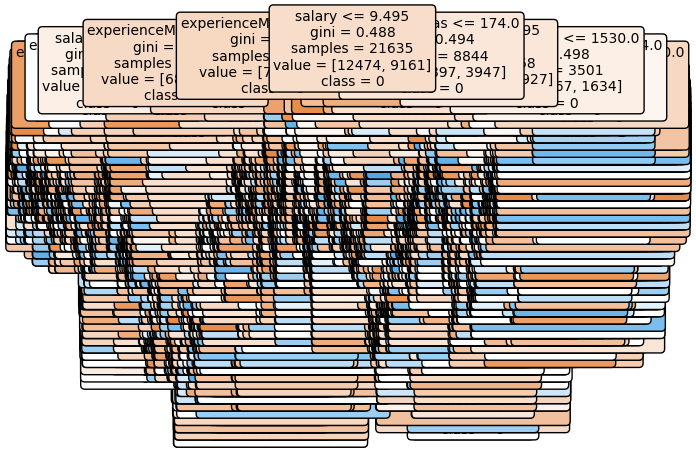

In [64]:
# Decision Tree : Plot [Training Subset] 
train_subset_dtc_plot = plot_tree(dtc_model, feature_names=df_inputs_names, class_names=df_output_labels, rounded=True, filled=True, fontsize=10)
plt.show()

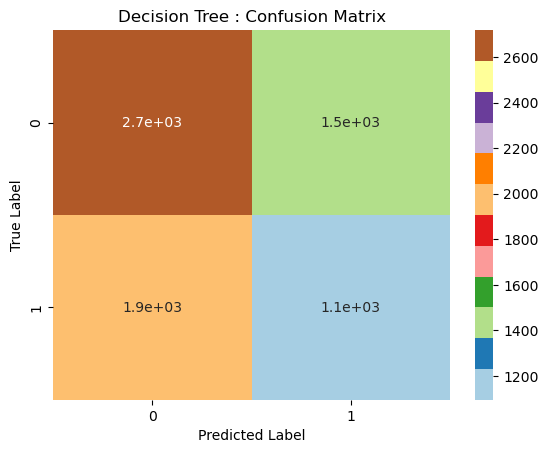

In [85]:
# Confusion Matrix : Plot [Testing Subset]
ax = plt.axes()
sns.heatmap(dtc_predict_conf_mat, annot=True, cmap='Paired')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Decision Tree : Confusion Matrix')
plt.show()